<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-with-pytorch-step-by-step/02_simple_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Simple Regression Problem

In this notebook, I will stick with a simple and familiar problem:
a linear regression with a single feature x! It doesn’t get much simpler than that…

$$ y = b + wx + ϵ$$

It is also possible to think of it as the simplest neural network possible: one input,
one output, and no activation function (that is, linear).

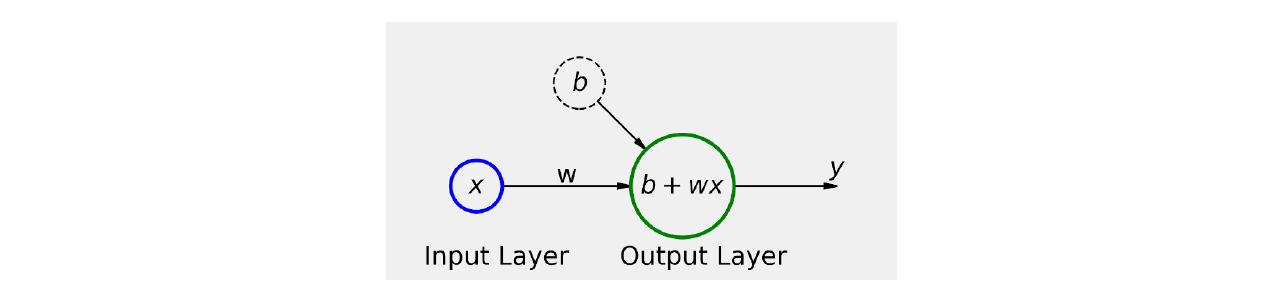

##Setup

In [1]:
try:
    import google.colab
    import requests
    url = 'https://raw.githubusercontent.com/dvgodoy/PyTorchStepByStep/master/config.py'
    r = requests.get(url, allow_redirects=True)
    open('config.py', 'wb').write(r.content)    
except ModuleNotFoundError:
    pass

from config import *
config_chapter1()
# This is needed to render the plots in this chapter
from plots.chapter1 import *

Installing torchviz...
Creating folders...
Finished!


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

##Data Generation

Let’s start generating some synthetic data: we start with a vector of `100 (N)` points
for our feature `(x)` and create our labels `(y)` using `b = 1, w = 2`, and some Gaussian noise (epsilon).

In [3]:
np.random.seed(42)

true_b = 1
true_w = 2
N = 100

# Data Generation
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.rand(N, 1))
y = true_b + true_w * x + epsilon

Next, let’s split our synthetic data into train and validation sets, shuffling the array
of indexes and using the first 80 shuffled points for training.

In [4]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N * .8)]
# Uses the remaining indices for validation
val_idx = idx[int(N * .8): ]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf50db2410>,
       dtype=object))

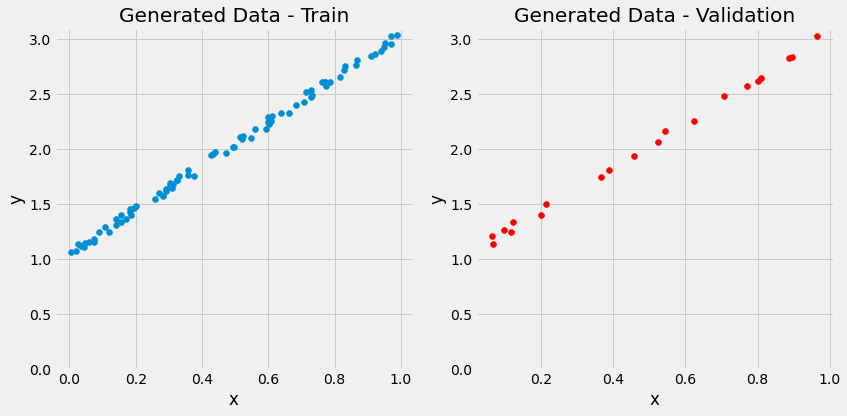

In [5]:
figure1(x_train, y_train, x_val, y_val)

We know that b = 1, w = 2, but now let’s see how close we can get to the true
values by using gradient descent and the 80 points in the training set.

##Gradient Descent

I’ll cover the five basic steps you’d need to go through to use gradient descent.

###Step 0: Random Initialization

For training a model, you need to randomly initialize the parameters/weights.

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


###Step 1: Compute Model's Predictions

This is the forward pass - it simply computes the model’s predictions using the current
values of the parameters/weights.

In [7]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

###Step 2: Compute the Loss

For a regression problem, the loss is given by the Mean Squared Error (MSE), that
is, the average of all squared errors, that is, the average of all squared differences
between labels (`y`) and predictions (`b + wx`).

Here, we are using all data points of the training set to compute the
loss, so `n = N = 80`, meaning we are performing batch gradient descent.

In [8]:
# Step 2 - Computing the loss

# We are using ALL data points, so this is BATCH gradient descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.808129216295391


###Step 3: Compute the Gradients

A gradient is a partial derivative — why partial? Because one computes it with
respect to (w.r.t.) a single parameter. We have two parameters, b and w, so we must compute two partial derivatives.

A derivative tells you how much a given quantity changes when you slightly vary
some other quantity. In our case, how much does our MSE loss change when we
vary each one of our two parameters separately?

> **Gradient** = how much the loss changes if ONE parameter
changes a little bit!

In [9]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.108262701823821 -1.8206663430690853


###Step 4 - Update the Parameters

In the final step, we use the gradients to update the parameters. 

Since we are
trying to minimize our losses, we reverse the sign of the gradient for the update.

In our example, let’s start with a value of 0.1 for the learning rate.

In [10]:
# Sets learning rate
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80754042] [0.04380233]


###Step 5 - Rinse and Repeat!

Now we use the updated parameters to go back to Step 1 and restart the process.

Repeating this process over and over for many epochs is, in a nutshell, training a
model.

##Linear Regression in Numpy

It’s time to implement our linear regression model using gradient descent and
Numpy only.

For each epoch, there are four training steps:

1. Compute model’s predictions — this is the forward pass
2. Compute the loss, using predictions and labels and the appropriate loss function
3. Compute the gradients for every parameter
4. Update the parameters

For now, we will be using batch gradient descent only, meaning, we’ll use all data
points for each one of the four steps above. It also means that going once through
all of the steps is already one epoch.

In [11]:
np.random.seed(42)

# Step 0 - Initializes parameters "b" and "w" randomly
b = np.random.randn(1)
w = np.random.randn(1)
print(b, w)

# Sets learning rate
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # Step 1 - Computes model's predicted output - forward pass
  yhat = b + w * x_train

  # Step 2 - Computes the loss
  # We are using ALL data points, so this is BATCH gradient descent. How wrong is our model? That's the error! 
  error = (yhat - y_train)
  # It is a regression, so it computes mean squared error (MSE)
  loss = (error ** 2).mean()

  # Step 3 - Computes gradients for both "b" and "w" parameters
  b_grad = 2 * error.mean()
  w_grad = 2 * (x_train * error).mean()

  # Step 4 - Updates parameters using gradients and the learning rate
  b = b - lr * b_grad
  w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[1.05303414] [1.99581323]


Just to make sure we haven’t done any mistakes in our code, we can use Scikit-
Learn’s Linear Regression to fit the model and compare the coefficients.

In [12]:
# Sanity Check: do we get the same results as our gradient descent?
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_, lin_reg.coef_[0])

[1.05303354] [1.99581441]


They match up to 6 decimal places — we have a fully working implementation of linear
regression using Numpy.

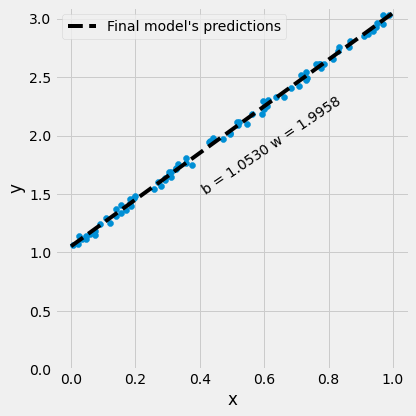

In [13]:
fig = figure3(x_train, y_train)

##PyTorch Basic

In Numpy, you may have an array that has three dimensions, right? That is,
technically speaking, a tensor.

You can create tensors in PyTorch pretty much the same way you create arrays in
Numpy. 

Using `tensor()` you can create either a scalar or a tensor.

In [14]:
scalar = torch.tensor(3.14159)
vector = torch.tensor([1, 2, 3])
matrix = torch.ones((2, 3), dtype=torch.float)
tensor = torch.randn((2, 3, 4), dtype=torch.float)

print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(3.1416)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.6291, -0.4928, -0.0780, -0.4176],
         [ 0.2595,  0.4698,  0.0641,  0.8023],
         [ 0.5542, -0.5085, -1.4040,  0.8507]],

        [[ 0.3093, -1.2875,  2.2664, -1.7359],
         [-0.1595,  1.0394, -0.5099, -0.8586],
         [ 1.0344, -0.5021,  2.0779,  0.3138]]])


You can get the shape of a tensor using its `size()` method or its shape attribute.

In [15]:
print(tensor.size(), tensor.shape)

torch.Size([2, 3, 4]) torch.Size([2, 3, 4])


In [16]:
# scalars have "empty" shapes
print(scalar.size(), scalar.shape)

torch.Size([]) torch.Size([])


You can also reshape a tensor using its `view()` (preferred) or `reshape()` methods.

In [17]:
# We get a tensor with a different shape but it still is the SAME tensor
same_matrix = matrix.view(1, 6)

# If we change one of its elements...
same_matrix[0, 1] = 2.

# It changes both variables: matrix and same_matrix
print(matrix)
print(same_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 2., 1., 1., 1., 1.]])


If you want to copy all data for real, that is, duplicate the data in memory, you may
use either its `new_tensor()` or `clone()` methods.

In [18]:
# We can use "new_tensor" method to REALLY copy it into a new one
different_matrix = matrix.new_tensor(matrix.view(1, 6))

# Now, if we change one of its elements...
different_matrix[0, 1] = 3.

# The original tensor (matrix) is left untouched!
# But we get a "warning" from PyTorch telling us to use "clone()" instead!
print(matrix)
print(different_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 3., 1., 1., 1., 1.]])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  


It seems that PyTorch prefers that we use `clone()` - together with `detach()` -
instead of `new_tensor()`… Both ways accomplish exactly the same result.

> `detach()` removes the tensor from the computation graph.

In [19]:
# Lets follow PyTorch's suggestion and use "clone" method
another_matrix = matrix.view(1, 6).clone().detach()

# Again, if we change one of its elements...
another_matrix[0, 1] = 4.

# The original tensor (matrix) is left untouched!
print(matrix)
print(another_matrix)

tensor([[1., 2., 1.],
        [1., 1., 1.]])
tensor([[1., 4., 1., 1., 1., 1.]])


###Loading Data, Devices and CUDA

It is time to start converting our Numpy code to PyTorch: we’ll start with the
training data.

In [20]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float64)

You can also easily cast it to a different type.

In [21]:
float_tensor = x_train_tensor.float()
float_tensor.dtype

torch.float32

>**IMPORTANT**: both `as_tensor()` and `from_numpy()` return a
tensor that shares the underlying data with the original Numpy
array. Similarly to what happened when we used view() in the
last section, if you modify the original Numpy array, you’re
modifying the corresponding PyTorch tensor too, and vice-versa.

In [22]:
dummy_array = np.array([1, 2, 3])
dummy_tensor = torch.as_tensor(dummy_array)

# Modifies the numpy array
dummy_array[1] = 0

# Tensor gets modified too...
dummy_tensor

tensor([1, 0, 3])

In [23]:
dummy_array

array([1, 0, 3])

In [24]:
# perform the opposite operation, transforming a PyTorch tensor back to a Numpy array
dummy_tensor.numpy() 

array([1, 0, 3])

So far, we have only created CPU tensors. 

What does it mean? 

It means the data in
the tensor is stored in the computer’s main memory and any operations performed
on it are going to be handled by its CPU.

Is there any other kind of tensor?

Yes, there is also a GPU tensor. 

A GPU (which stands for Graphics Processing Unit)
is the processor of a graphics card. These tensors store their data in the graphics
card’s memory and operations on top of them are performed by the GPU.

Let's find out if we have a GPU.

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


Let's figure it out how many GPUs we have.

In [26]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
  print(torch.cuda.get_device_name(i))

Tesla T4


There is only one thing left to do: turn our tensor into a GPU tensor. That’s what
`to()` is good for. It sends a tensor to the specified device.

In [27]:
gpu_tensor = torch.as_tensor(x_train).to(device)
gpu_tensor[0]  # GPU tensor

tensor([0.5227], device='cuda:0', dtype=torch.float64)

In [28]:
x_train_tensor[0]  # CPU tensor

tensor([0.5227], dtype=torch.float64)

Should I use `to(device)`, even if I am using CPU only?

Yes, you should, because there is no cost in doing so. If you have only a CPU, your
tensor is already a CPU tensor, so nothing will happen. But if you share your code
with others on GitHub, whoever has a GPU will benefit from it.

Let’s put it all together now and make our training data ready for PyTorch.

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

Here we can see the difference - notice that `.type()` is more useful since it also tells us WHERE the tensor is (device).

In [30]:
print(type(x_train), type(x_train_tensor), x_train_tensor.type())  # GPU tensor

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.FloatTensor


In [31]:
print(type(dummy_array), type(dummy_tensor), dummy_tensor.type())  # CPU tensor

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.LongTensor


But where does the x_train_tensor “live”? Is it a CPU or a GPU tensor? 

You can’t
say… but if you use PyTorch’s `type()`, it will reveal its location — `torch.cuda.FloatTensor` — a GPU tensor in this case.

Now, let's see.

What if we want to turn a GPU tensor back into a Numpy array?

In [32]:
try:
  back_to_numpy = x_train_tensor.numpy()
except TypeError:
  print("TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.")

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.


Unfortunately, Numpy cannot handle GPU tensors… you need to make them CPU
tensors first using `cpu()`.

In [33]:
back_to_numpy = x_train_tensor.cpu().numpy()

So, to avoid this error, use first `cpu()` and then `numpy()`, even if you are using a CPU.

###Creating Parameters

What distinguishes a tensor used for training data (or validation, or test) — like the
ones we’ve just created — from a tensor used as a (trainable) parameter/weight?

The latter requires the computation of its gradients, so we can update their values
(the parameters’ values, that is). 

That’s what the `requires_grad=True` argument is
good for. It tells PyTorch to compute gradients for us.

> A tensor for a learnable parameter requires a gradient!

In [34]:
torch.manual_seed(42)

# FIRST
# Initializes parameters "b" and "w" randomly, ALMOST as we
# did in Numpy since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [35]:
torch.manual_seed(42)

# SECOND
# But what if we want to run it on a GPU? We could just send them to device, right?
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)

tensor([0.3367], device='cuda:0', grad_fn=<ToCopyBackward0>) tensor([0.1288], device='cuda:0', grad_fn=<ToCopyBackward0>)


In [36]:
torch.manual_seed(42)

# THIRD
# We can either create regular tensors and send them to the device (as we did with our data)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()
print(b, w)

tensor([0.3367], device='cuda:0', requires_grad=True) tensor([0.1288], device='cuda:0', requires_grad=True)


This approach worked fine; we managed to end up with gradient-requiring GPU
tensors for our parameters `b` and `w`. 

It seems a lot of work, though… Can we do
better still?

Yes, we can do better: we can assign tensors to a device at the moment of their
creation.

In [37]:
torch.manual_seed(42)

# FINAL
# We can specify the device at the moment of creation
# RECOMMENDED!

# Step 0 - Initializes parameters "b" and "w" randomly
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


Now that we know how to create tensors that require gradients, let’s see how
PyTorch handles them.

##Autograd

Autograd is PyTorch’s automatic differentiation package. Thanks to it, we don’t need
to worry about partial derivatives, chain rule, or anything like it.

Do you remember the starting point for computing the gradients? 

It was the loss,
as we computed its partial derivatives w.r.t. our parameters. 

Hence, we need to
invoke the `backward()` method from the corresponding Python variable:
`loss.backward()`.

In [38]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = (yhat - y_train_tensor)
# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

# Step 3 - Computes gradients for both "b" and "w" parameters
# No more manual computation of gradients! 
# b_grad = 2 * error.mean()
# w_grad = 2 * (x_tensor * error).mean()
loss.backward()

Do you see the pattern here? 

If a tensor in the list is used to compute another
tensor, the latter will also be included in the list. Tracking these dependencies is
exactly what the dynamic computation graph is doing.

In [39]:
print(error.requires_grad, yhat.requires_grad, b.requires_grad, w.requires_grad)
print(y_train_tensor.requires_grad, x_train_tensor.requires_grad)

True True True True
False False


What about the actual values of the gradients? 

We can inspect them by looking at
the grad attribute of a tensor.

In [40]:
print(b.grad, w.grad)

tensor([-3.4542], device='cuda:0') tensor([-1.9347], device='cuda:0')


If you check the method’s documentation, it clearly states that **gradients are
accumulated**. 

What does it mean? 

It means that, if we run gradient update twice and check the grad attribute afterward.

In [41]:
print(b.grad, w.grad)

tensor([-3.4542], device='cuda:0') tensor([-1.9347], device='cuda:0')


These gradients' values are exactly twice as much as they were before, as
expected!

OK, but that is actually a problem: we need to use the gradients corresponding to the current loss to perform the parameter update. 

We should NOT use
accumulated gradients.

So, every time we use the gradients to update the parameters, we need to zero the
gradients afterward.





In [42]:
# This code will be placed _after_ Step 4 (updating the parameters)
b.grad.zero_(), w.grad.zero_()

(tensor([0.], device='cuda:0'), tensor([0.], device='cuda:0'))

###Updating Parameters

Unfortunately, our Numpy's code for updating parameters is not enough… why
not?! 

Let’s try it out, simply copying and pasting it (this is the first attempt), changing
it slightly (second attempt), and then asking PyTorch to back off (yes, it is PyTorch’s
fault!).

In [43]:
torch.manual_seed(42)

# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # Step 1 - Computes model's predicted output - forward pass
  yhat = b + w * x_train_tensor

  # Step 2 - Computes the loss
  error = (yhat - y_train_tensor)
  loss = (error ** 2).mean()

  # Step 3 - Computes gradients for both "b" and "w" parameters
  # No more manual computation of gradients! 
  # b_grad = 2 * error.mean()
  # w_grad = 2 * (x_tensor * error).mean()   
  # We just tell PyTorch to work its way BACKWARDS from the specified loss!
  loss.backward()

  # Step 4 - Updates parameters using gradients and the learning rate. But not so fast...

  # FIRST ATTEMPT - just using the same code as before
  # AttributeError: 'NoneType' object has no attribute 'zero_'
  # b = b - lr * b.grad
  # w = w - lr * w.grad
  # print(b)
  
  # SECOND ATTEMPT - using in-place Python assigment
  # RuntimeError: a leaf Variable that requires grad
  # has been used in an in-place operation.
  # b -= lr * b.grad
  # w -= lr * w.grad 

  # THIRD ATTEMPT - NO_GRAD for the win!
  # We need to use NO_GRAD to keep the update out of
  # the gradient computation. Why is that? It boils 
  # down to the DYNAMIC GRAPH that PyTorch uses...
  with torch.no_grad():
    b -= lr * b.grad
    w -= lr * w.grad

  # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
  b.grad.zero_() # zero_ prevents gradient accumulation
  w.grad.zero_()

print(b, w)

tensor([1.0530], device='cuda:0', requires_grad=True) tensor([1.9958], device='cuda:0', requires_grad=True)


###Dynamic Computation Graph

The `PyTorchViz` package and its `make_dot(variable)` method allow us to easily
visualize a graph associated with a given Python variable involved in the gradient
computation.



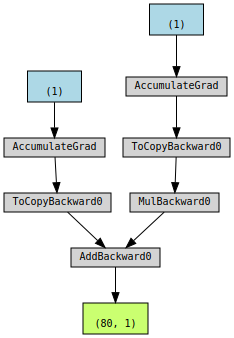

In [44]:
torch.manual_seed(42)

# Step 0 - Initializes parameters "b" and "w" randomly
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()

# We can try plotting the graph for any python variable
make_dot(yhat)

So, even though there are more tensors involved in the operations performed by
the computation graph, it only shows gradient-computing tensors and its
dependencies.

What would happen to the computation graph if we set `requires_grad` to False for
our parameter `b`?

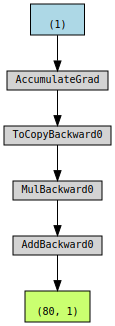

In [45]:
torch.manual_seed(42)

# Step 0 - Initializes parameters "b" and "w" randomly
b_no_grad = torch.randn(1, requires_grad=False, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b_no_grad + w * x_train_tensor

make_dot(yhat)

>Simple enough: no gradients, no graph!

The best thing about the dynamic computation graph is the fact that you can make it as complex as you want it. You can even use control flow statements (e.g., if
statements) to control the flow of the gradients.

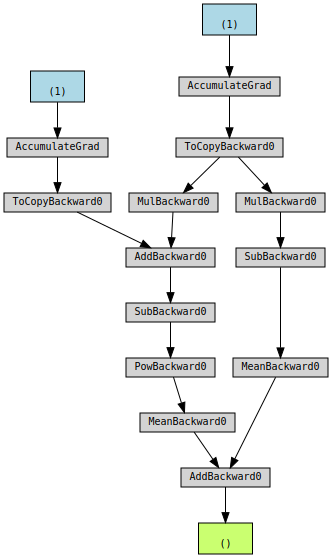

In [46]:
torch.manual_seed(42)

# Step 0 - Initializes parameters "b" and "w" randomly
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
error = (yhat - y_train_tensor)
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
  yhat2 = w * x_train_tensor
  error2 = (yhat2 - y_train_tensor)
# neither does this :-)
loss += error2.mean()

# We can try plotting the graph for any python variable
make_dot(loss)

Even though the computation is nonsensical, you can clearly see the effect of
adding a control flow statement.



##Optimizer

An optimizer takes the parameters we want to update, the learning rate we want
to use (and possibly many other hyper-parameters as well!), and performs the
updates through its `step()` method.

Besides, we also don’t need to zero the gradients one by one anymore. We just
invoke the optimizer’s `zero_grad()` method, and that’s it!

In [47]:
torch.manual_seed(42)

# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # Step 1 - Computes model's predicted output - forward pass
  yhat = b + w * x_train_tensor

  # Step 2 - Computes the loss
  error = (yhat - y_train_tensor)
  loss = (error ** 2).mean()

  # Step 3 - Computes gradients for both "b" and "w" parameters
  loss.backward()

  # Step 4 - Updates parameters using gradients and the learning rate. But not so fast...

  # the learning rate. No more manual update!
  # with torch.no_grad():
  #     b -= lr * b.grad
  #     w -= lr * w.grad
  optimizer.step()

  # No more telling Pytorch to let gradients go!
  # b.grad.zero_()
  # w.grad.zero_()
  optimizer.zero_grad()

print(b, w)

tensor([1.0530], device='cuda:0', requires_grad=True) tensor([1.9958], device='cuda:0', requires_grad=True)


##Loss

We now tackle the loss computation.

There are many loss functions to choose from, depending on the task at
hand. Since ours is a regression, we are using the Mean Squared Error (MSE) as
loss, and thus we need PyTorch’s `nn.MSELoss`.

In [48]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction="mean")
loss_fn

MSELoss()

Notice that `nn.MSELoss` is NOT the loss function itself: we do not pass predictions
and labels to it!

Instead, as you can see, it returns another function, which we called
`loss_fn`: that is the actual loss function. 

So, we can pass a prediction and a label to
it and get the corresponding loss value.

In [49]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

tensor(1.1700)

>Technically speaking, `nn.MSELoss` is a higher-order function.

In [50]:
torch.manual_seed(42)

# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction="mean")
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  # Step 1 - Computes model's predicted output - forward pass
  yhat = b + w * x_train_tensor

  # Step 2 - Computes the loss
  # No more manual loss!
  # error = (yhat - y_train_tensor)
  # loss = (error ** 2).mean()
  loss = loss_fn(yhat, y_train_tensor)

  # Step 3 - Computes gradients for both "b" and "w" parameters
  loss.backward()

  # Step 4 - Updates parameters using gradients and the learning rate. But not so fast...
  optimizer.step()
  optimizer.zero_grad()

print(b, w)

tensor([1.0530], device='cuda:0', requires_grad=True) tensor([1.9958], device='cuda:0', requires_grad=True)


Let’s take a look at the loss value at the end of training.

In [51]:
loss

tensor(0.0008, device='cuda:0', grad_fn=<MseLossBackward0>)

What if we wanted to have it as a Numpy array?

In [52]:
try:
  loss.cpu().numpy()
except RuntimeError as re:
  print(re)

Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.


What happened here? 

Unlike our data tensors, the loss tensor is actually computing
gradients - to use `numpy()`, we need to `detach()` the tensor from the computation
graph first:

In [53]:
loss.detach().cpu().numpy()

array(0.00081317, dtype=float32)

This seems like a lot of work; there must be an easier way! 

And there is one indeed:
* we can use `item()`, for tensors with a single element 
* or tolist() otherwise (it still returns a scalar if there is only one element, though)

In [54]:
print(loss.item(), loss.tolist())

0.0008131694048643112 0.0008131694048643112


##Model

The most fundamental methods a model class needs to implement are:

* `__init__(self)`: it defines the parts that make up the model — in our case,
two parameters, `b` and `w`.
* `forward(self, x)`: it performs the actual computation, that is, it outputs a
prediction, given the input `x`.

Let’s build a proper (yet simple) model for our regression task.

In [55]:
class LinearRegression(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # To make "b" and "w" real parameters of the model, we need to wrap them with nn.Parameter
    self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x):
    # Computes the outputs / predictions
    return self.b + self.w * x

Why should we care about the parameters of the model?

By doing so, we can use our model’s `parameters()`
method to retrieve an iterator over all model’s parameters, including parameters
of nested models. 

Then we can use it to feed our optimizer (instead of building a list
of parameters ourselves!).

In [56]:
torch.manual_seed(42)

# Creates a "dummy" instance of our LinearRegression model
dummy = LinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

Moreover, we can get the current values of all parameters using our model’s
`state_dict()` method.

In [57]:
dummy.state_dict()

OrderedDict([('w', tensor([0.3367])), ('b', tensor([0.1288]))])

By the way, the optimizer itself has a `state_dict()` too, which contains its internal
state, as well as other hyper-parameters.

In [58]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1]}]}

We need to send our model to the same device
where the data is. If our data is made of GPU tensors, our model
must “live” inside the GPU as well.

In [59]:
torch.manual_seed(42)

# Creates a "dummy" instance of our LinearRegression model and sends it to the device
dummy = LinearRegression().to(device)

The forward pass is the moment when the model makes predictions.

>Remember: you should make predictions calling `model(x)`

In [61]:
torch.manual_seed(42)

# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
# b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
# w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
# Now we can create a model and send it at once to the device
model = LinearRegression().to(device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction="mean")
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
  model.train()  # set the model to training mode

  # Step 1 - Computes model's predicted output - forward pass
  # No more manual prediction!
  yhat = model(x_train_tensor)

  # Step 2 - Computes the loss
  loss = loss_fn(yhat, y_train_tensor)

  # Step 3 - Computes gradients for both "b" and "w" parameters
  loss.backward()

  # Step 4 - Updates parameters using gradients and the learning rate. But not so fast...
  optimizer.step()
  optimizer.zero_grad()

# We can also inspect its parameters using its state_dict
print(model.state_dict())

OrderedDict([('w', tensor([0.3367], device='cuda:0')), ('b', tensor([0.1288], device='cuda:0'))])


##Nested Models